<a href="https://colab.research.google.com/github/zakia16/Machine-Learning-Projects/blob/main/Creep_rupture_LMP_(all_feature_with_Lasso).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("617 rupture data master.csv")

# Display the first few rows of the dataset to understand its structure
data.head()

Saving 617 rupture data master.csv to 617 rupture data master.csv


,Source,Temp,Stress(MPa),Environment,Heat,Aging Condition,Form,Ni (wt. %),Cr,Co,...,Mo,Fe,Al,Si,C,S,Ti,Cu,B,LMP
0,GE,950,55.2,0,2,NaN,1,53.9495,22.05,11.95,...,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,25328.46446
1,GE,850,96.6,0,2,NaN,1,53.9495,22.05,11.95,...,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,23512.58194
2,GE,950,44.8,0,2,NaN,1,53.9495,22.05,11.95,...,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,25864.88651
3,GE,950,37.9,0,2,NaN,1,53.9495,22.05,11.95,...,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,26236.87220
4,GE,850,75.9,0,2,NaN,1,53.9495,22.05,11.95,...,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,24162.57035


#Step 1 : Basic Statistics

In [2]:
data.describe()

,Temp,Stress(MPa),Environment,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,Al,Si,C,S,Ti,Cu,B,LMP
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,820.728571,135.535143,0.457143,0.185714,54.835479,21.491143,12.029714,0.039750,8.997214,0.771643,1.053714,0.176243,0.066379,0.002021,0.174757,0.034186,0.001214,24428.454190
std,138.963547,127.174433,0.501757,0.391684,2.151875,0.943129,0.292302,0.013538,0.373918,0.260430,0.232118,0.038244,0.006462,0.001543,0.176808,0.036593,0.001495,3204.037789
min,593.000000,9.660000,0.000000,0.000000,52.275000,20.300000,11.720000,0.020000,8.580000,0.380000,0.760000,0.100000,0.057000,0.000500,0.000000,0.000000,0.000000,18829.044780
25%,704.000000,37.900000,0.000000,0.000000,52.275000,20.300000,11.720000,0.027000,8.580000,0.530000,0.760000,0.160000,0.057000,0.001000,0.000000,0.000000,0.000000,21969.186617
50%,850.000000,67.600000,0.000000,0.000000,54.529750,21.940000,11.950000,0.050000,9.037500,0.975000,1.180000,0.175000,0.070000,0.001000,0.165750,0.027500,0.000750,24749.211175
75%,950.000000,207.000000,1.000000,0.000000,57.350000,22.430000,12.230000,0.050000,9.405000,1.010000,1.210000,0.218500,0.070000,0.004000,0.331500,0.055000,0.001500,26634.446380
max,1100.000000,414.000000,1.000000,1.000000,57.350000,22.430000,12.550000,0.054500,9.405000,1.010000,1.310000,0.218500,0.072500,0.004000,0.380000,0.091000,0.004000,30796.728220


#Step 2: Checking for Missing Values

In [ ]:
# Check for missing values in each column
data.isnull().sum()

Source              0
Temp                0
Stress(MPa)         0
Environment         0
Heat                0
Aging Condition    35
Form                0
Ni (wt. %)          0
Cr                  0
Co                  0
Mn                  0
Mo                  0
Fe                  0
Al                  0
Si                  0
C                   0
S                   0
Ti                  0
Cu                  0
B                   0
LMP                 0
dtype: int64

In [3]:
# Drop the 'Aging Condition' column
data = data.drop(columns=['Aging Condition'])

# Show the first few rows of the updated dataset
data.head()


,Source,Temp,Stress(MPa),Environment,Heat,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,Al,Si,C,S,Ti,Cu,B,LMP
0,GE,950,55.2,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,25328.46446
1,GE,850,96.6,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,23512.58194
2,GE,950,44.8,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,25864.88651
3,GE,950,37.9,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,26236.87220
4,GE,850,75.9,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,24162.57035


#Step 3. Exploratory Data Analysis (EDA)

<ipython-input-4-464cc46e033d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidth =2)


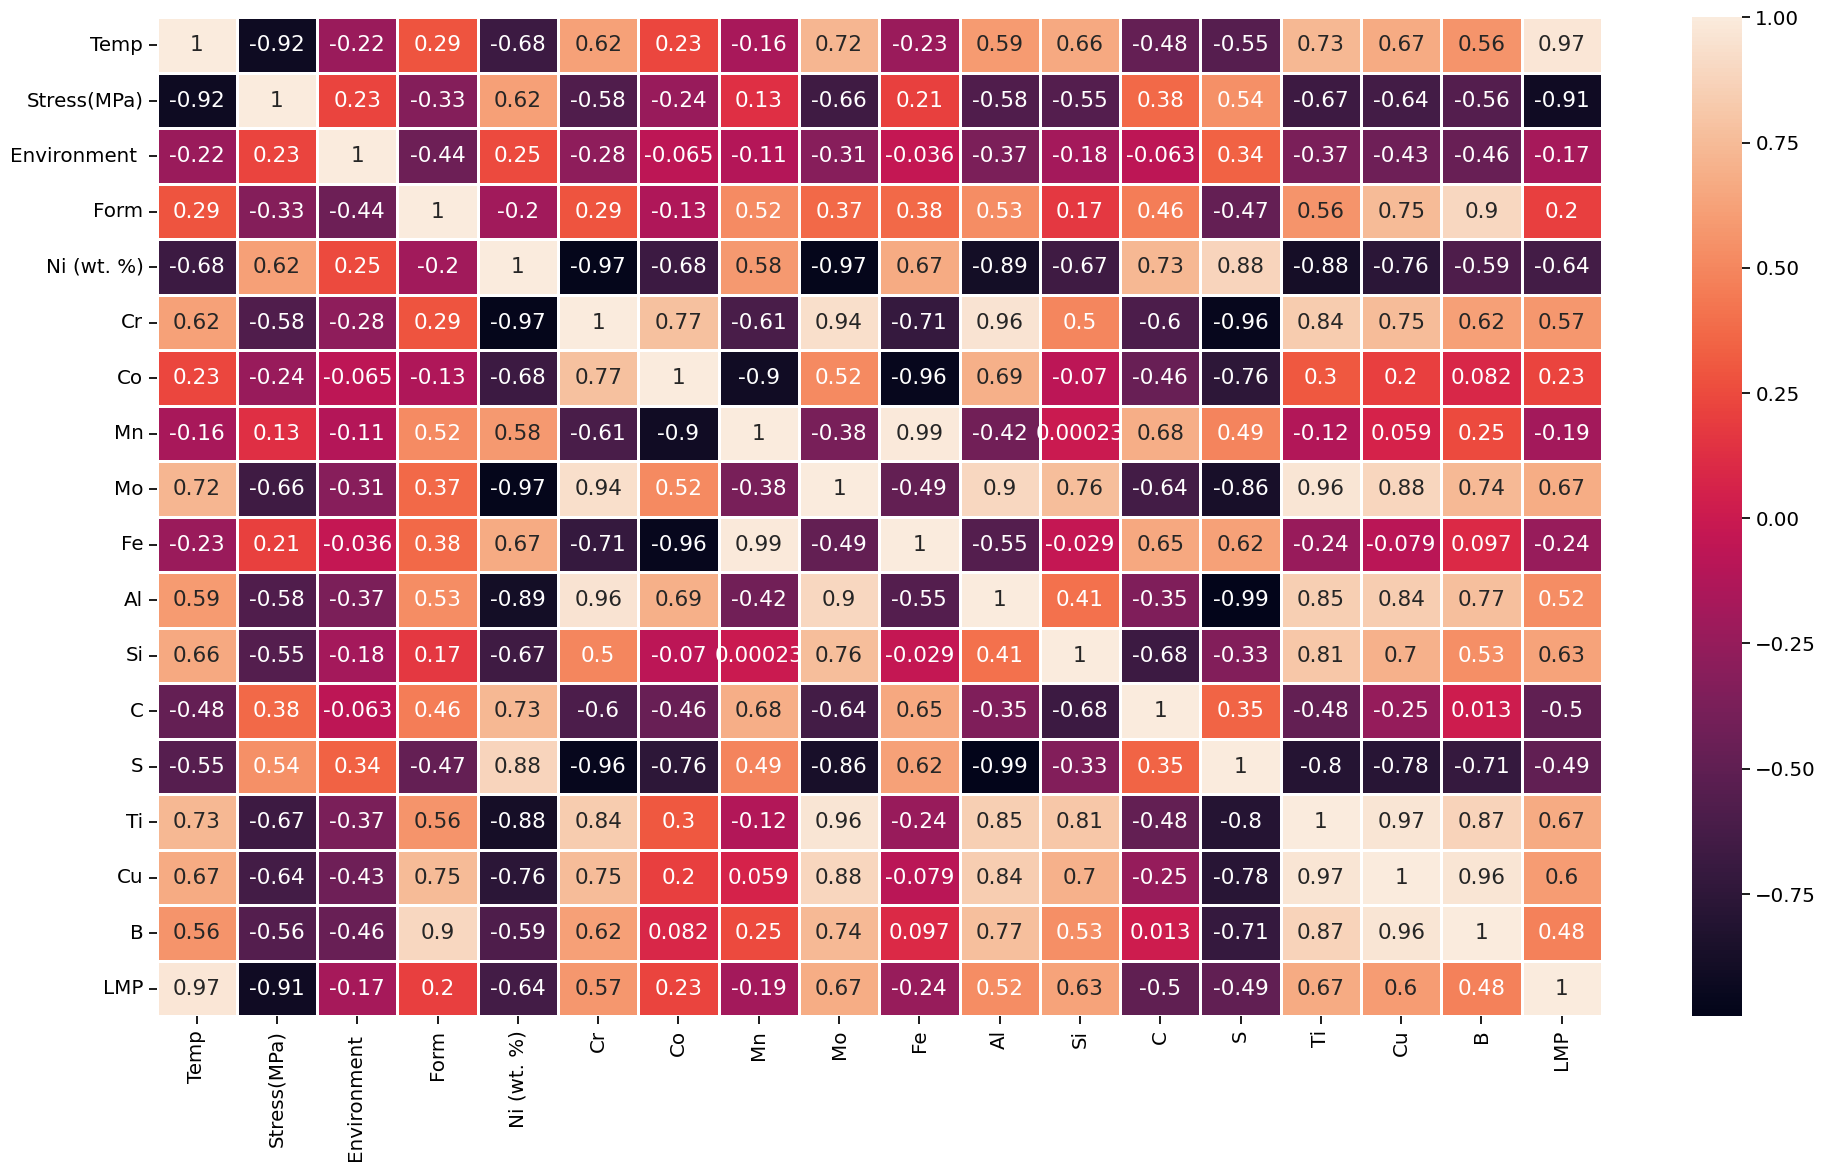

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

Some features have a correlation close to zero with the target, indicating a weak linear relationship.    
There are no pairs of features that are extremely highly correlated, so multicollinearity doesn't seem to be a significant concern.


In [ ]:
import matplotlib.pyplot as plt
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Splitting data into features and target
X = data.drop('LMP', axis=1)
y = data['LMP']

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Train the model using the training sets
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe for visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(14, 7))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

ValueError: ignored

Considering the insights from both the correlation heatmap and the feature importance from Random Forest:

We don't observe extremely high correlations between any pair of features, so there's no immediate need to drop features based on multicollinearity.   
All features seem to contribute some information for the prediction, though features like fbs and restecg have a relatively lower importance.

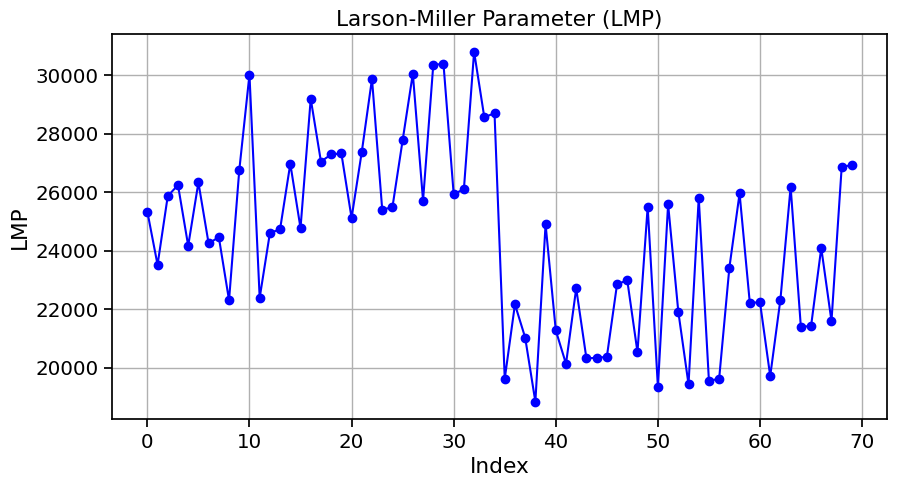

In [5]:
import matplotlib.pyplot as plt

# Plotting the LMP values
plt.figure(figsize=(10, 5))
plt.plot(data['LMP'], marker='o', linestyle='-', color='b')
plt.title('Larson-Miller Parameter (LMP)')
plt.xlabel('Index')
plt.ylabel('LMP')
plt.grid(True)
plt.show()


**Inference:** The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

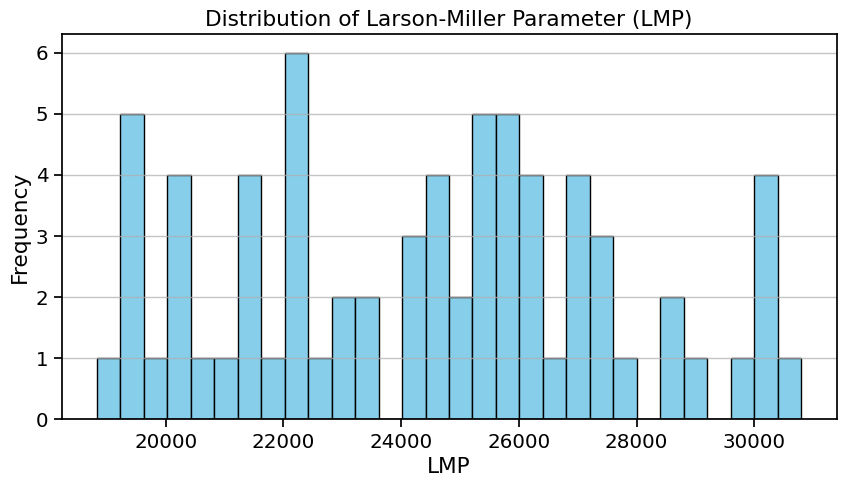

In [ ]:
# Plotting the LMP values as a histogram
plt.figure(figsize=(10, 5))
plt.hist(data['LMP'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Larson-Miller Parameter (LMP)')
plt.xlabel('LMP')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-13-abbadcfe5775>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LMP'], kde=True, hist=True)


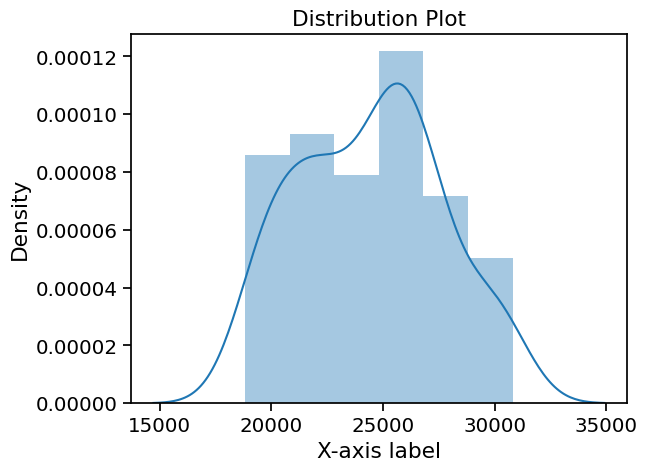

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot using sns.distplot
sns.distplot(data['LMP'], kde=True, hist=True)

# Add labels and a title
plt.xlabel("X-axis label")
plt.ylabel("Density")
plt.title("Distribution Plot")

# Show the plot
plt.show()


Log(life): Calculate W

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Applying the Shapiro-Wilk test
stat, p_value = stats.shapiro(data['LMP'])

# Displaying the test statistic and the p-value
print(f'Statistic W: {stat}, p-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis, data seems to be normally distributed.')
else:
    print('Reject the null hypothesis, data does not seem to be normally distributed.')

Statistic W: 0.9664643406867981, p-value: 0.05751001834869385
Fail to reject the null hypothesis, data seems to be normally distributed.


array([[<Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Stress(MPa)'}>,
        <Axes: title={'center': 'Environment '}>,
        <Axes: title={'center': 'Form'}>],
       [<Axes: title={'center': 'Ni (wt. %)'}>,
        <Axes: title={'center': 'Cr'}>, <Axes: title={'center': 'Co'}>,
        <Axes: title={'center': 'Mn'}>],
       [<Axes: title={'center': 'Mo'}>, <Axes: title={'center': 'Fe'}>,
        <Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'S'}>,
        <Axes: title={'center': 'Ti'}>, <Axes: title={'center': 'Cu'}>],
       [<Axes: title={'center': 'B'}>, <Axes: title={'center': 'LMP'}>,
        <Axes: >, <Axes: >]], dtype=object)

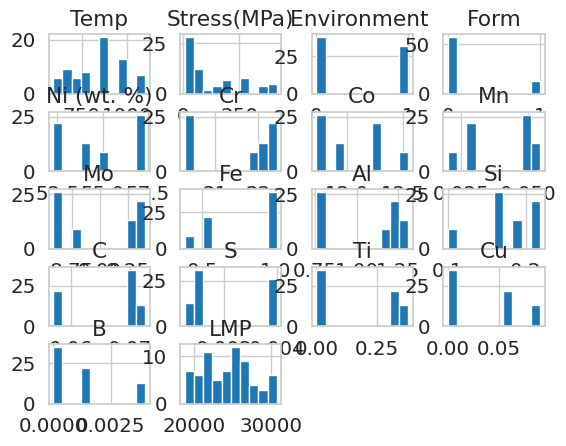

In [ ]:
data.hist()

distribution of some key features (Non Categorical)

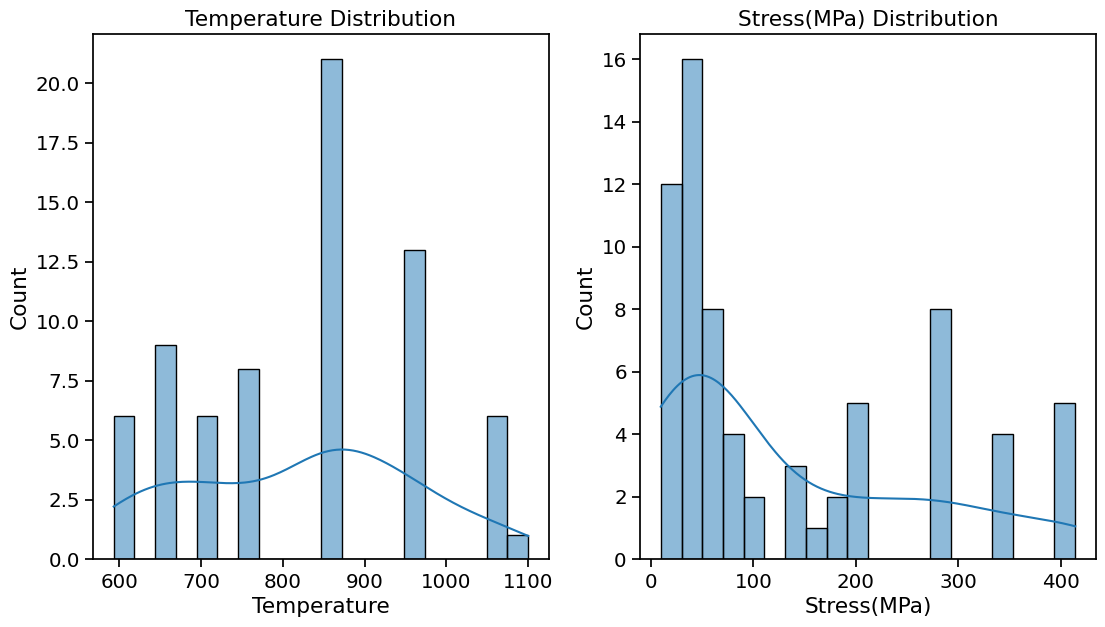

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(20, 15))

# Temperature distribution
plt.subplot(2, 3, 1)
sns.histplot(data['Temp'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Stress(MPa) distribution
plt.subplot(2, 3, 2)
sns.histplot(data['Stress(MPa)'], bins=20, kde=True)
plt.title('Stress(MPa) Distribution')
plt.xlabel('Stress(MPa)')
plt.ylabel('Count')
plt.show()

plt.tight_layout()
plt.show()

**Resting Blood Pressure Distribution:** Resting blood pressure (trestbps) distribution is approximately normal with a peak around 130 mm Hg.
**Cholesterol Distribution**: The serum cholesterol (chol) distribution is slightly right-skewed, with most values between 200 and 300 mg/dl.
**Maximum Heart Rate Distribution:** The maximum heart rate (thalach) distribution is somewhat left-skewed, with a peak a little above 150.   
**ST Depression Distribution:** The ST depression (oldpeak) distribution is heavily right-skewed, indicating most participants have low ST depression values.

distribution of some key features (Categorical Variables)

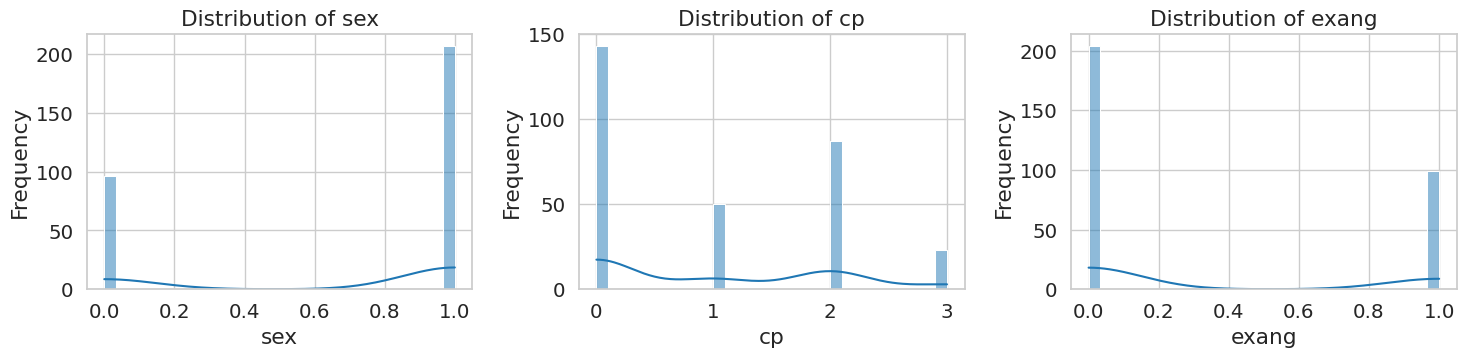

In [ ]:
import matplotlib.pyplot as plt
# Selecting some key features to visualize
key_features = ['sex', 'cp','exang']

# Plotting the distributions of the key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Sex:** There are more male patients (represented by 1) than female patients.                     
**Chest Pain Type (cp):** The majority of patients have a chest pain type of 0, followed by type 2. Types 1 and 3 are less common.                   
**Exercise Induced Angina (exang):** The majority of patients do not experience exercise-induced angina.

#Step 4. Feature Engineering

In [6]:
data.head()

,Source,Temp,Stress(MPa),Environment,Heat,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,Al,Si,C,S,Ti,Cu,B,LMP
0,GE,950,55.2,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,25328.46446
1,GE,850,96.6,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,23512.58194
2,GE,950,44.8,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,25864.88651
3,GE,950,37.9,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,26236.87220
4,GE,850,75.9,0,2,1,53.9495,22.05,11.95,0.0545,9.285,0.975,1.31,0.19,0.0725,0.0005,0.38,0.091,0.004,24162.57035


The categorical columns in the dataset are:    
Source: ['GE', 'ORNL']  
Heat: ['2', '1', 'A', 'B']  
Form: [1, 0]  (The "Form" column appears to be binary (0 or 1), so we might not need to encode it using one-hot encoding; we can keep it as it is.)

In [7]:
#Convert Categorical Variables through one hot encoding
data = pd.get_dummies(data, columns = ['Source', 'Heat'])
data.head()

,Temp,Stress(MPa),Environment,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,...,Ti,Cu,B,LMP,Source_GE,Source_ORNL,Heat_1,Heat_2,Heat_A,Heat_B
0,950,55.2,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,25328.46446,1,0,0,1,0,0
1,850,96.6,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,23512.58194,1,0,0,1,0,0
2,950,44.8,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,25864.88651,1,0,0,1,0,0
3,950,37.9,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,26236.87220,1,0,0,1,0,0
4,850,75.9,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,24162.57035,1,0,0,1,0,0


#Scaling Numerical Variables
Standardization (Z-score normalization) as it's a common choice for many machine learning models.

In [8]:
data.head()

,Temp,Stress(MPa),Environment,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,...,Ti,Cu,B,LMP,Source_GE,Source_ORNL,Heat_1,Heat_2,Heat_A,Heat_B
0,950,55.2,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,25328.46446,1,0,0,1,0,0
1,850,96.6,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,23512.58194,1,0,0,1,0,0
2,950,44.8,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,25864.88651,1,0,0,1,0,0
3,950,37.9,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,26236.87220,1,0,0,1,0,0
4,850,75.9,0,1,53.9495,22.05,11.95,0.0545,9.285,0.975,...,0.38,0.091,0.004,24162.57035,1,0,0,1,0,0


In [9]:
from sklearn.preprocessing import StandardScaler

# Identifying the numerical columns
numerical_cols = ['Temp', 'Stress(MPa)', 'Ni (wt. %)', 'Cr', 'Co', 'Mn', 'Mo', 'Fe', 'Al', 'Si', 'C', 'S', 'Ti', 'Cu', 'B', 'LMP']

# Applying standardization to the numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Displaying the first few rows of the dataset after scaling
first_few_rows_after_scaling = data.head()
first_few_rows_after_scaling


,Temp,Stress(MPa),Environment,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,...,Ti,Cu,B,LMP,Source_GE,Source_ORNL,Heat_1,Heat_2,Heat_A,Heat_B
0,0.936971,-0.636254,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,0.282927,1,0,0,1,0,0
1,0.212162,-0.308366,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,-0.287913,1,0,0,1,0,0
2,0.936971,-0.718621,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,0.451556,1,0,0,1,0,0
3,0.936971,-0.773269,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,0.568494,1,0,0,1,0,0
4,0.212162,-0.472310,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,-0.083583,1,0,0,1,0,0


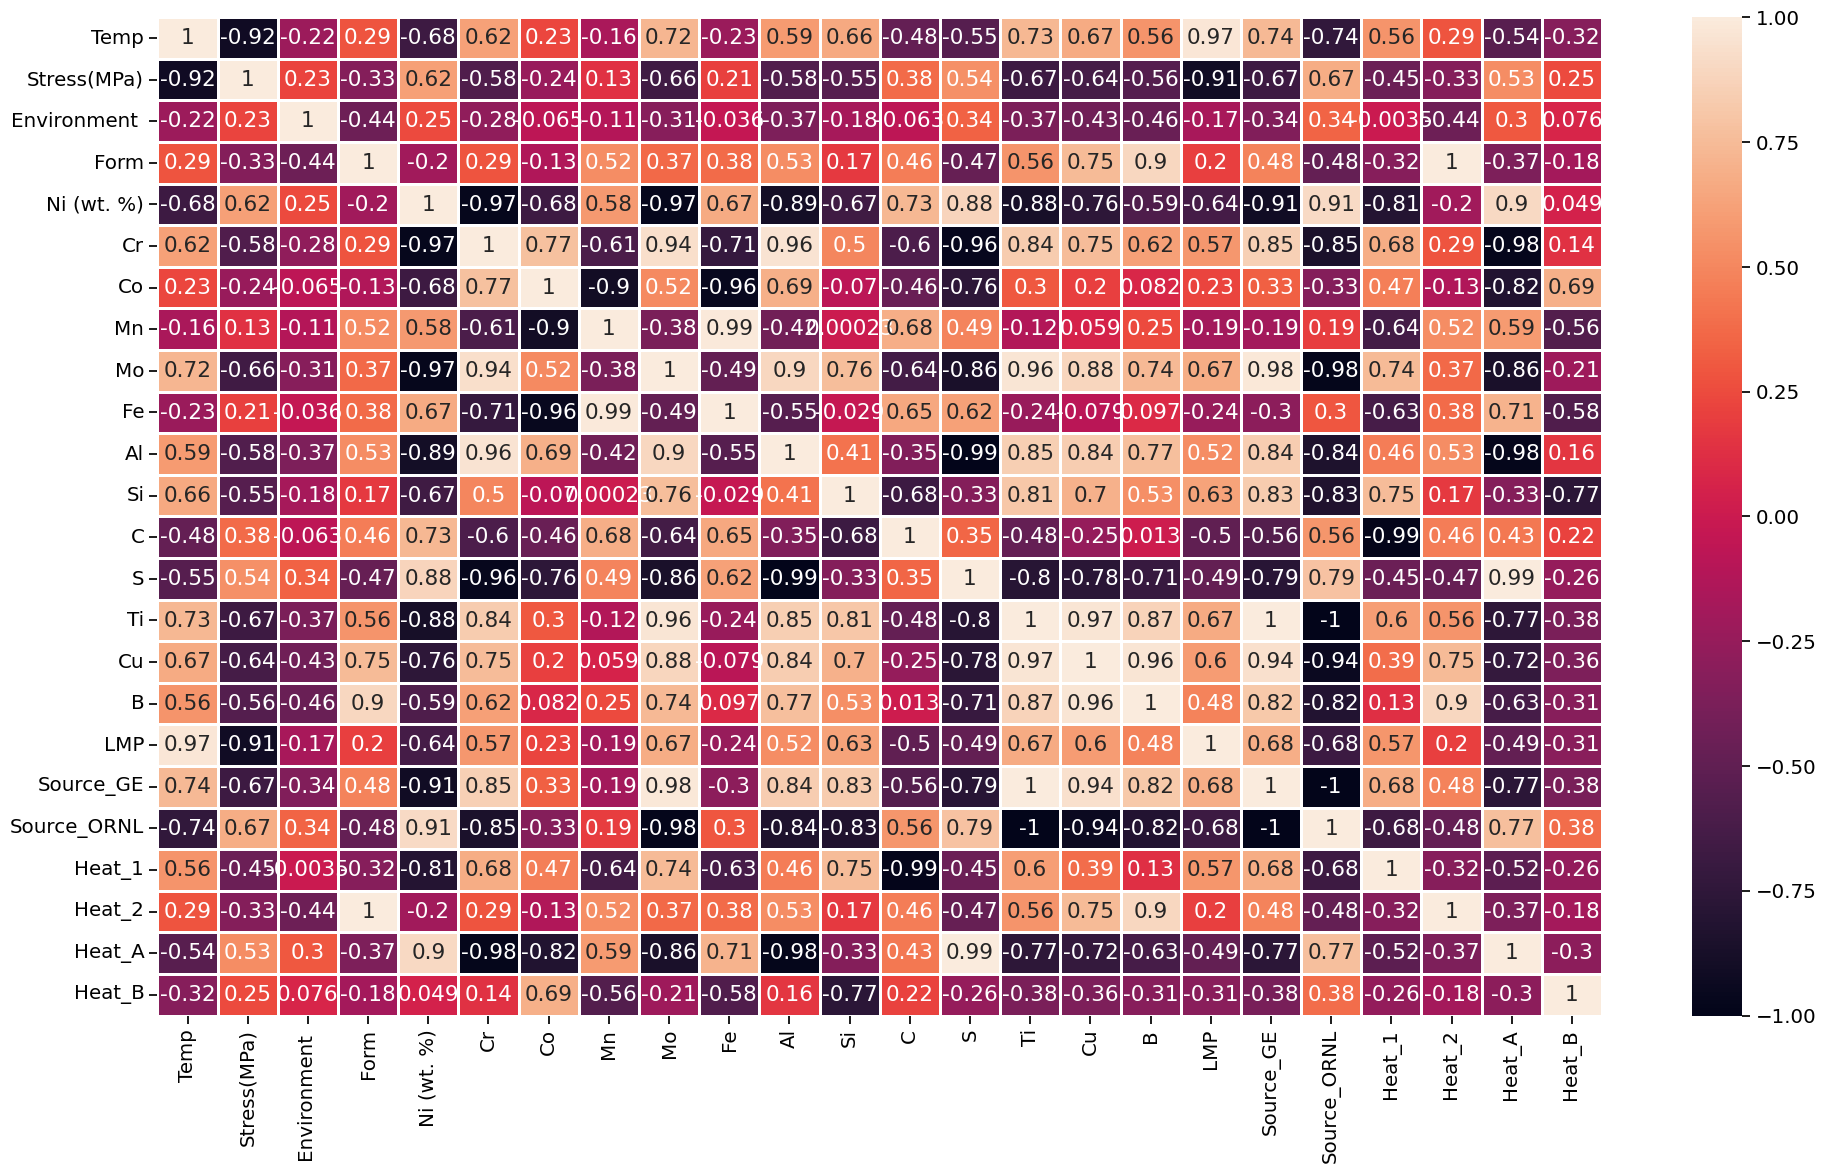

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

Handling Outliers:  
1)Z-Score: Identifying values that are more than 3 standard deviations away from the mean.   
2)IQR (Interquartile Range): Identifying values that are below
Q1−1.5×IQR or above
Q3+1.5×IQR, where
IQR=Q3−Q1.    
3)Visualization: Using box plots to visually identify outliers.

In [ ]:
import numpy as np

# Setting the threshold for identifying outliers
z_score_threshold = 3

# Identifying outliers in the numerical columns
outliers = np.abs(data[numerical_cols]) > z_score_threshold

# Summarizing the number of outliers in each column
num_outliers_per_column = outliers.sum()
num_outliers_per_column

Temp           0
Stress(MPa)    0
Ni (wt. %)     0
Cr             0
Co             0
Mn             0
Mo             0
Fe             0
Al             0
Si             0
C              0
S              0
Ti             0
Cu             0
B              0
LMP            0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X = data.drop('LMP', axis=1)
y = data['LMP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((56, 23), (14, 23))

In [ ]:
data.head()

,Temp,Stress(MPa),Environment,Form,Ni (wt. %),Cr,Co,Mn,Mo,Fe,...,Ti,Cu,B,LMP,Source_GE,Source_ORNL,Heat_1,Heat_2,Heat_A,Heat_B
0,0.936971,-0.636254,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,0.282927,1,0,0,1,0,0
1,0.212162,-0.308366,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,-0.287913,1,0,0,1,0,0
2,0.936971,-0.718621,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,0.451556,1,0,0,1,0,0
3,0.936971,-0.773269,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,0.568494,1,0,0,1,0,0
4,0.212162,-0.472310,0,1,-0.414697,0.596835,-0.274681,1.097361,0.775206,0.78649,...,1.169202,1.563791,1.876388,-0.083583,1,0,0,1,0,0


knn

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Initializing the KNN regressor model
knn_regressor = KNeighborsRegressor()

# Training the model
knn_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_knn = knn_regressor.predict(X_test)

# Calculating performance metrics
mse_knn = metrics.mean_squared_error(y_test, y_pred_knn)
r2_knn = metrics.r2_score(y_test, y_pred_knn)

mse_knn, r2_knn

(0.06378488618506177, 0.9069068862307503)

In [ ]:
 Support Vector Regression (SVR):

In [12]:
from sklearn.svm import SVR

# Initializing the Support Vector Regression model
svr_model = SVR()

# Training the model
svr_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_svr = svr_model.predict(X_test)

# Calculating performance metrics
mse_svr = metrics.mean_squared_error(y_test, y_pred_svr)
r2_svr = metrics.r2_score(y_test, y_pred_svr)

mse_svr, r2_svr

(0.054489761232339125, 0.9204729859210851)

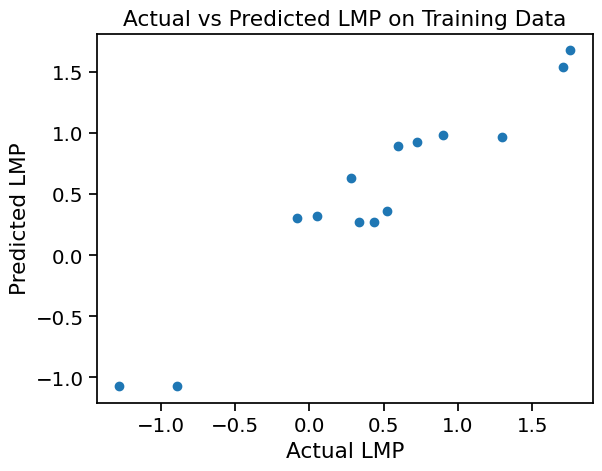

In [13]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_svr)
plt.xlabel("Actual LMP")
plt.ylabel("Predicted LMP")
plt.title("Actual vs Predicted LMP on Training Data")
plt.show()

Linear Regression

In [ ]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Building and fitting a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#-----------------------------------------------
# Making predictions on the testing set
y_pred = linear_reg_model.predict(X_test)

# Making predictions on the training set
y_train_pred = linear_reg_model.predict(X_train)

# Model Evaluation on Test Set
print('R^2 (Test Set):', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 (Test Set):', 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE (Test Set):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Test Set):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Test Set):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Model Evaluation on Training Set
print('\nR^2 (Training Set):', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2 (Training Set):', 1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE (Training Set):', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE (Training Set):', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE (Training Set):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


R^2 (Test Set): 0.9083944910862776
Adjusted R^2 (Test Set): 1.119087161587839
MAE (Test Set): 0.20973191757604617
MSE (Test Set): 0.06276561953303696
RMSE (Test Set): 0.25053067583239574

R^2 (Training Set): 0.9637948312910769
Adjusted R^2 (Training Set): 0.9377723662815385
MAE (Training Set): 0.16320669877324345
MSE (Training Set): 0.03672215213151925
RMSE (Training Set): 0.19163024847742396


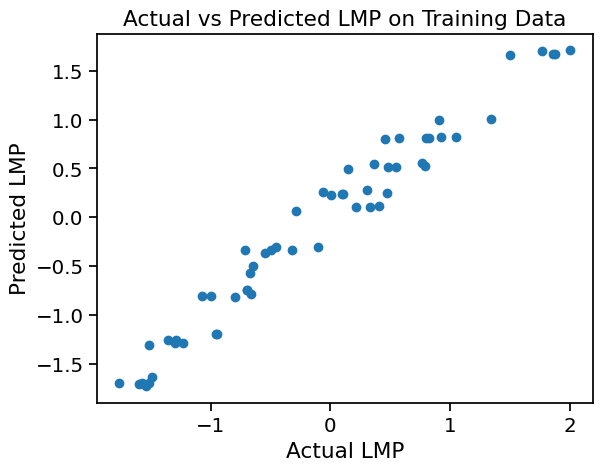

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual LMP")
plt.ylabel("Predicted LMP")
plt.title("Actual vs Predicted LMP on Training Data")
plt.show()

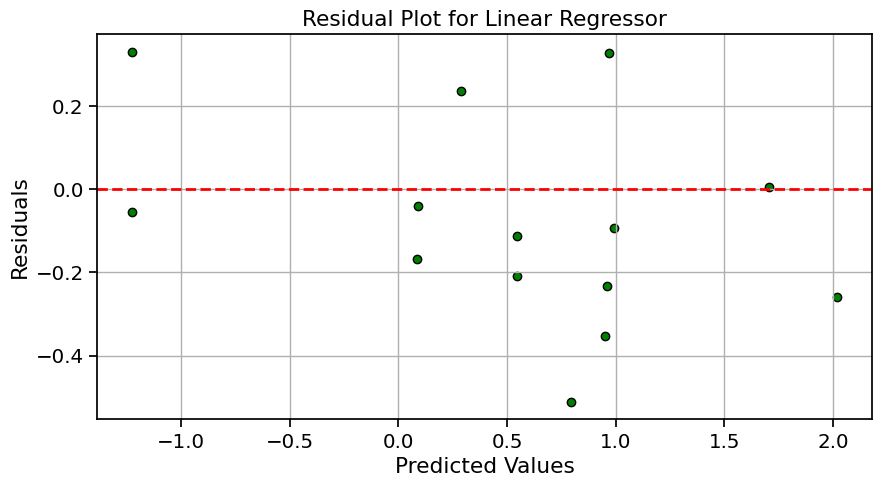

In [ ]:
# Calculating residuals for Random Forest Regressor
residuals_rf = y_test - y_pred

# Plotting the residual plot for Random Forest Regressor
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals_rf, color='green', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regressor')
plt.grid(True)
plt.show()

<ipython-input-15-b4283646ae28>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


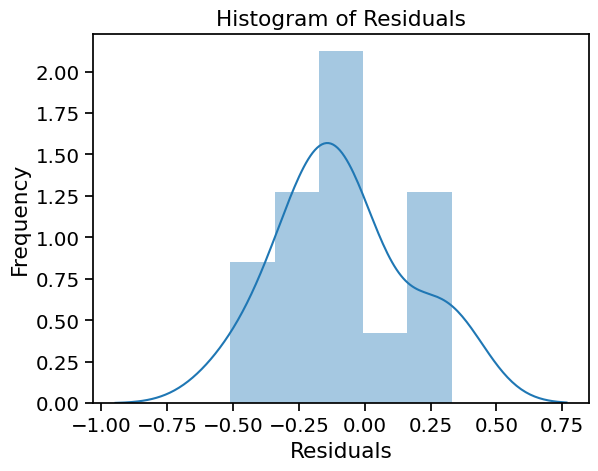

In [ ]:
# Checking Normality of errors
sns.distplot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

#Perform Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_results = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')

# The "neg_mean_squared_error" scoring returns negative values. Taking the negative of the results gives us the positive MSE values.
mse_values = -cv_results

# Calculating the average and standard deviation of the MSE values
average_mse = np.mean(mse_values)
std_dev_mse = np.std(mse_values)

average_mse, std_dev_mse


(-0.7718332895867197, 0.1565346703196889)

Lasso Regression

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LassoCV

# Define the LassoCV model with cross-validation
lasso_model = LassoCV(alphas=np.logspace(-6, 6, 13), max_iter=5000)

# Preprocessing of training data, fit model
lasso_model.fit(X_train, y_train)

# Get the best alpha value found during cross-validation
best_alpha_lasso = lasso_model.alpha_

# Preprocessing of validation data, get predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
lasso_mae = metrics.mean_absolute_error(y_test, y_pred_lasso)
lasso_r2  = metrics.r2_score(y_test, y_pred_lasso)

best_alpha_lasso, lasso_mae, lasso_r2

(1.0, 667.080342427784, 0.9084127421402437)

Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initializing the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(random_state=42)

# Training the model
gb_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_gb = gb_regressor.predict(X_test)

# Calculating performance metrics
mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)
r2_gb = metrics.r2_score(y_test, y_pred_gb)

mse_gb, r2_gb

# Model Evaluation on Test Set
print('R^2 (Test Set):', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 (Test Set):', 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE (Test Set):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Test Set):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Test Set):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Model Evaluation on Training Set
print('\nR^2 (Training Set):', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2 (Training Set):', 1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE (Training Set):', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE (Training Set):', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE (Training Set):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2 (Test Set): 0.9083944910862776
Adjusted R^2 (Test Set): 1.119087161587839
MAE (Test Set): 0.20973191757604617
MSE (Test Set): 0.06276561953303696
RMSE (Test Set): 0.25053067583239574

R^2 (Training Set): 0.9637948312910769
Adjusted R^2 (Training Set): 0.9377723662815385
MAE (Training Set): 0.16320669877324345
MSE (Training Set): 0.03672215213151925
RMSE (Training Set): 0.19163024847742396


XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Initializing the Gradient Boosting Regressor model
gb_regressor = XGBRegressor()

# Training the model
gb_regressor.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_gb = gb_regressor.predict(X_test)

# Calculating performance metrics
mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)
r2_gb = metrics.r2_score(y_test, y_pred_gb)

mse_gb, r2_gb

# Model Evaluation on Test Set
print('R^2 (Test Set):', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 (Test Set):', 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE (Test Set):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Test Set):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Test Set):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Model Evaluation on Training Set
print('\nR^2 (Training Set):', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2 (Training Set):', 1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE (Training Set):', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE (Training Set):', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE (Training Set):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2 (Test Set): 0.9083944910862776
Adjusted R^2 (Test Set): 1.119087161587839
MAE (Test Set): 0.20973191757604617
MSE (Test Set): 0.06276561953303696
RMSE (Test Set): 0.25053067583239574

R^2 (Training Set): 0.9637948312910769
Adjusted R^2 (Training Set): 0.9377723662815385
MAE (Training Set): 0.16320669877324345
MSE (Training Set): 0.03672215213151925
RMSE (Training Set): 0.19163024847742396


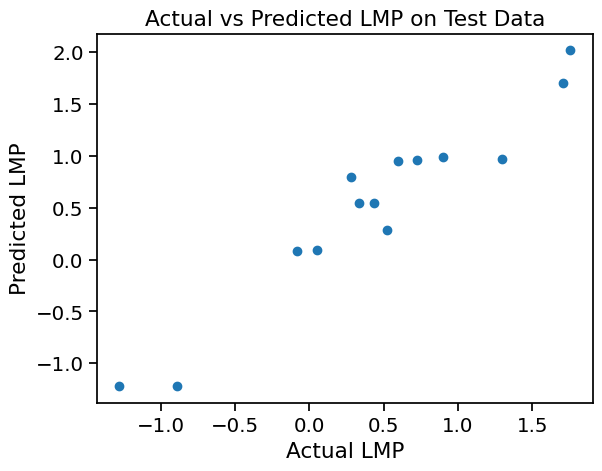

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual LMP")
plt.ylabel("Predicted LMP")
plt.title("Actual vs Predicted LMP on Test Data")
plt.show()

Random Forest Regressor

Random Forest is a powerful and flexible algorithm that can handle both linear and non-linear relationships and is **less sensitive to the effects of highly correlated features**.

In [ ]:

from sklearn.ensemble import RandomForestRegressor

# Building the Random Forest Model
random_forest_model = RandomForestRegressor(random_state=42)

# Training the Model
random_forest_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Making predictions on the training set
y_train_pred = random_forest_model.predict(X_train)

# Model Evaluation on Test Set
print('R^2 (Test Set):', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 (Test Set):', 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE (Test Set):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Test Set):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Test Set):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Model Evaluation on Training Set
print('\nR^2 (Training Set):', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2 (Training Set):', 1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE (Training Set):', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE (Training Set):', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE (Training Set):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

R^2 (Test Set): 0.9754738035894368
Adjusted R^2 (Test Set): 1.031884055333732
MAE (Test Set): 0.1094002217537992
MSE (Test Set): 0.016804687084352243
RMSE (Test Set): 0.12963289352765464

R^2 (Training Set): 0.9966463963838125
Adjusted R^2 (Training Set): 0.9942359937846776
MAE (Training Set): 0.04446601815941899
MSE (Training Set): 0.003401490631698119
RMSE (Training Set): 0.05832229960913852


In [ ]:
# Get feature importances from the model
rf_feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display feature importance
rf_feature_importance = pd.DataFrame(data={'Feature': feature_names, 'Importance': rf_feature_importances})

# Sort the features based on importance
rf_feature_importance = rf_feature_importance.reindex(rf_feature_importance.Importance.sort_values(ascending=False).index)

rf_mae, rf_r2, rf_feature_importance.head(10)

NameError: ignored

  Feature  Importance  
 1                       Stress(MPa)    0.889266  
 0                              Temp    0.100558  
 2                      Environment     0.001541  
 5                                Cr    0.000826  
 6                                Co    0.000749  
 23  Aging Condition_482/28300/Steam    0.000717  
 11                               Si    0.000684  
 7                                Mn    0.000644  
 9                                Fe    0.000619  
 4                        Ni (wt. %)    0.000616)

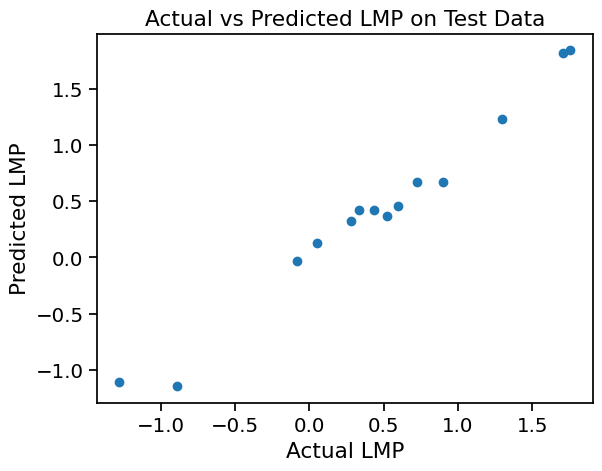

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual LMP")
plt.ylabel("Predicted LMP")
plt.title("Actual vs Predicted LMP on Test Data")
plt.show()

1. Residual Analysis:

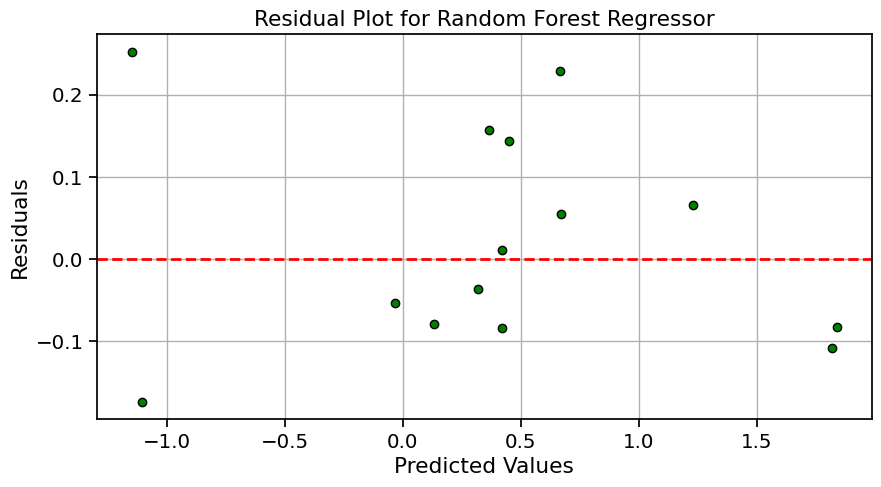

NameError: ignored

In [ ]:
# Calculating residuals for Random Forest Regressor
residuals_rf = y_test - y_pred

# Plotting the residual plot for Random Forest Regressor
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals_rf, color='green', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regressor')
plt.grid(True)
plt.show()


# Checking residuals
plt.scatter(y_pred,y_train_subset-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Interpretation of Residual Plot:   
A well-fitted model should have residuals randomly scattered around zero, without any clear patterns.   
The red dashed line at 0 represents where the residuals would be if the model’s predictions were perfect.   
From the plot, it seems that the residuals are fairly randomly distributed around zero, which is a good sign. There doesn’t appear to be any clear patterns or heteroscedasticity (funnel-shaped pattern), suggesting that the model has done a good job of capturing the underlying patterns in the data.  
Again, In the provided residual plot:
If the residuals were completely random and the model had captured all the underlying patterns in the data, we would expect to see a "cloud" of points that is symmetrically distributed around the horizontal line at 0, with no clear patterns.   
However, in the plot, while many residuals are close to 0, there seems to be a slight pattern where for certain ranges of predicted values, the residuals are mostly above or below 0. This could suggest that the model is consistently under or over-predicting in those ranges.  
This does not necessarily mean the model is performing poorly; it still might be capturing the majority of the variance in the target variable, as indicated by the high value. However, it does suggest that there might be room for improvement, possibly by using a more complex model, adding more features, or transforming existing features.

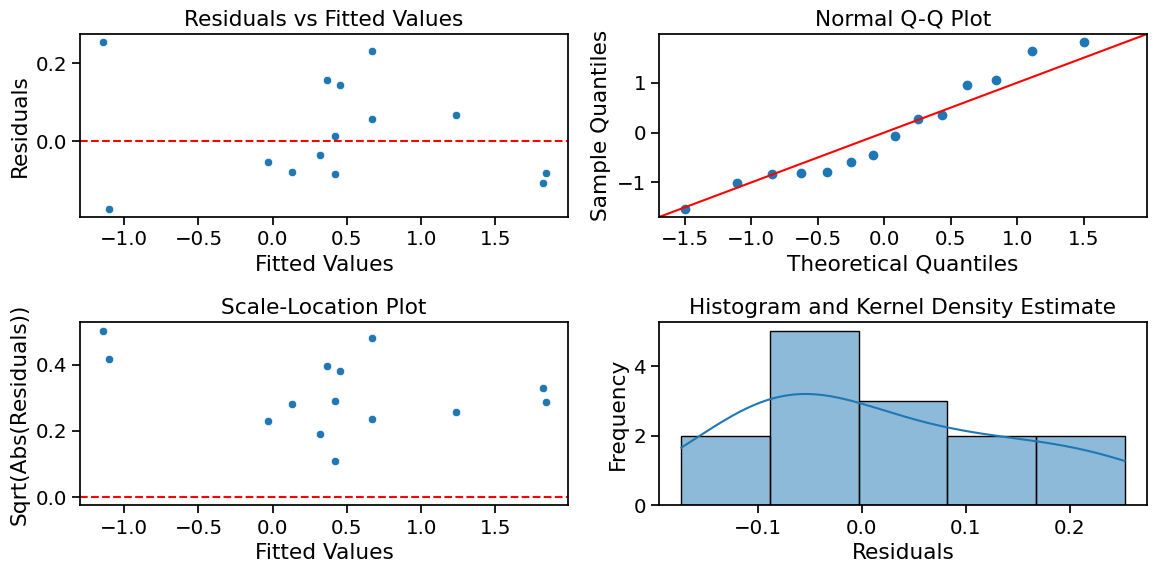

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm

# Residuals vs Fitted Values Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Normal Q-Q Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals_rf, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q Plot')

# Scale-Location Plot
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=np.sqrt(np.abs(residuals_rf)))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Abs(Residuals))')
plt.title('Scale-Location Plot')

# Histogram and Kernel Density Estimate
plt.subplot(2, 2, 4)
sns.histplot(residuals_rf, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram and Kernel Density Estimate')

plt.tight_layout()
plt.show()


1. Residuals vs. Fitted Values Plot:
Ideally, this plot should show no clear pattern, and the residuals should be randomly scattered around the horizontal line at 0.
In the plot, the residuals seem to be randomly scattered, which is a good sign.
2. Normal Q-Q Plot:
This plot shows how well the residuals approximate a normal distribution.
If the points fall along the straight line, it indicates that the residuals are normally distributed.
The plot shows that the residuals deviate from the straight line in the tails, suggesting that the residuals have heavier tails than a normal distribution.
3. Scale-Location Plot:
This plot helps to check for homoscedasticity (constant variance of residuals across levels of the independent variables).
Ideally, the points should be randomly scattered and not show any particular pattern.
The plot does not show a clear pattern, suggesting that the variance of residuals is relatively constant.
4. Histogram and Kernel Density Estimate:
This plot provides a visual representation of the distribution of residuals.
The plot shows that the residuals are approximately normally distributed, but with some skewness.   
In summary, the diagnostic plots suggest that the residuals are approximately normally distributed and do not show clear patterns or heteroscedasticity. However, the Normal Q-Q Plot indicates that the residuals have heavier tails than a normal distribution, which is a point to note.

2. Cross-Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_results = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='r2')

# The "neg_mean_squared_error" scoring returns negative values. Taking the negative of the results gives us the positive MSE values.
mse_values = -cv_results

# Calculating the average and standard deviation of the MSE values
average_mse = np.mean(mse_values)
std_dev_mse = np.std(mse_values)

average_mse, std_dev_mse

(-0.9308937036833097, 0.044754020151303926)

The Random Forest Regressor model has outperformed all the previous models in terms of both MSE and r2, showcasing the power of ensemble learning methods.

Neural Network

In [14]:
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#-----------------------------------------------
# Initialize the Multi-Layer Perceptron Regressor
# We'll start with a simple network with one hidden layer with 100 neurons
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', random_state=42, max_iter=1000)

# Train the model on the scaled training data
mlp_model.fit(X_train, y_train)

# Predict the LMP on the scaled test data
y_pred = mlp_model.predict(X_test)

# Making predictions on the training set
y_train_pred = mlp_model.predict(X_train)


# Model Evaluation on Test Set
print('R^2 (Test Set):', metrics.r2_score(y_test, y_pred))
print('Adjusted R^2 (Test Set):', 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE (Test Set):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Test Set):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Test Set):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Model Evaluation on Training Set
print('\nR^2 (Training Set):', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R^2 (Training Set):', 1 - (1-metrics.r2_score(y_train, y_train_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE (Training Set):', metrics.mean_absolute_error(y_train, y_train_pred))
print('MSE (Training Set):', metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE (Training Set):', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


R^2 (Test Set): 0.9398296276162881
Adjusted R^2 (Test Set): 1.0782214840988256
MAE (Test Set): 0.1768339252239947
MSE (Test Set): 0.04122711335793341
RMSE (Test Set): 0.2030446092806539

R^2 (Training Set): 0.9764688401432614
Adjusted R^2 (Training Set): 0.9595558189962305
MAE (Training Set): 0.12422680385660537
MSE (Training Set): 0.023867167669827247
RMSE (Training Set): 0.15449002449940658


In [16]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_results = cross_val_score(MLPRegressor(), X, y, cv=5, scoring='r2')

# The "neg_mean_squared_error" scoring returns negative values. Taking the negative of the results gives us the positive MSE values.
mse_values = -cv_results

# Calculating the average and standard deviation of the MSE values
average_mse = np.mean(mse_values)
std_dev_mse = np.std(mse_values)

average_mse, std_dev_mse

(-0.7884937284158041, 0.16304836722205124)

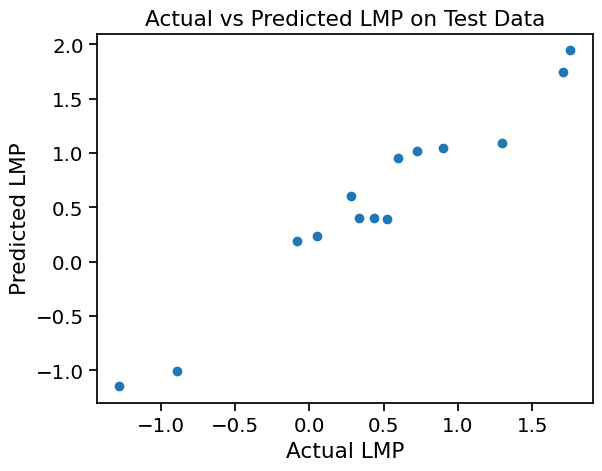

In [19]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual LMP")
plt.ylabel("Predicted LMP")
plt.title("Actual vs Predicted LMP on Test Data")
plt.show()

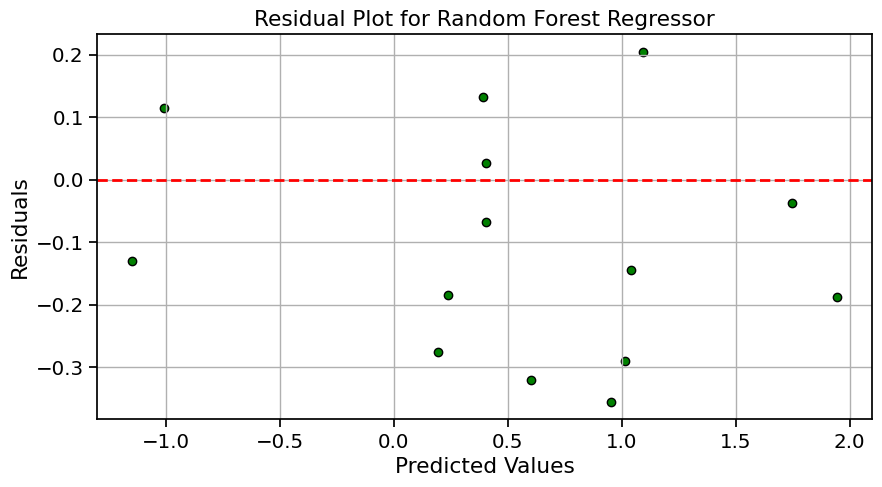

NameError: ignored

In [18]:
# Calculating residuals for Random Forest Regressor
residuals_rf = y_test - y_pred

# Plotting the residual plot for Random Forest Regressor
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals_rf, color='green', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regressor')
plt.grid(True)
plt.show()


# Checking residuals
plt.scatter(y_pred,y_train_subset-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

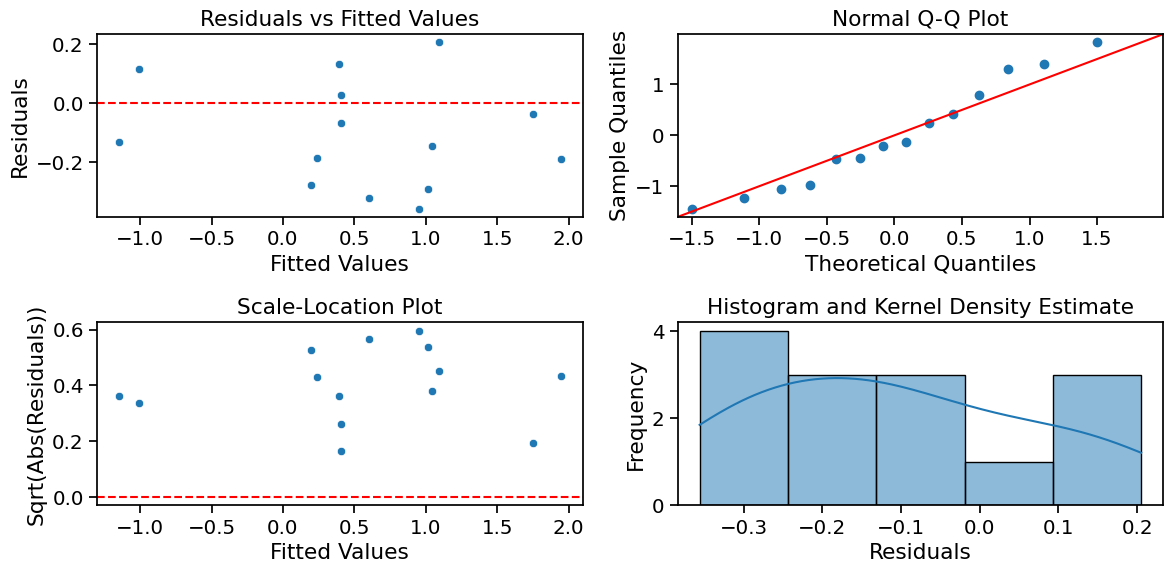

In [20]:
import scipy.stats as stats
import statsmodels.api as sm

# Residuals vs Fitted Values Plot
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

# Normal Q-Q Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals_rf, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q Plot')

# Scale-Location Plot
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_pred, y=np.sqrt(np.abs(residuals_rf)))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(Abs(Residuals))')
plt.title('Scale-Location Plot')

# Histogram and Kernel Density Estimate
plt.subplot(2, 2, 4)
sns.histplot(residuals_rf, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram and Kernel Density Estimate')

plt.tight_layout()
plt.show()
